In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [158]:
df = pd.read_excel('/Users/nguyenthaohau/Desktop/National Economic University/NEU 2022-2023 HK01/Python Programmig/Pandas_demo/Book4.xlsx')

In [159]:
pd.set_option('display.max_columns', 38)
pd.set_option('display.max_rows', 20)

In [160]:
df

,Timestamp,Sex,Age,Educ,Income,Status,COL1,COL2,COL3,EWOM1,EWOM2,EWOM3,EWOM4,LUA1,LUA2,LUA3,LUA4,LUA5,FEM1,FEM2,FEM3,FEM4,LTO1,LTO2,LTO3,RES1,RES2,RES3,ATT1,ATT2,ATT3,ATT4,SN1,SN2,IN1,IN2,SUM,STDEV
0,2022-01-03 11:56:22.894,Nữ,18 - 22,Đại học,Dưới 7 triệu VND,Chưa từng sử dụng,3,3,4,4,3,4,4,4,4,3,3,3,3,4,4,3,4,4,4,3,3,3,3,3,3,3,3,4,4,3,103,0.504007
1,2022-01-06 20:40:29.610,Nữ,41 - 50,Dưới đại học,Dưới 7 triệu VND,Đã từng sử dụng,4,5,4,5,4,5,4,5,4,5,4,5,4,5,5,4,4,5,5,4,4,5,5,4,5,5,5,4,5,5,137,0.504007
2,2022-01-06 22:15:25.246,Nữ,23 - 30,Đại học,Dưới 7 triệu VND,Chưa từng sử dụng,5,5,4,5,4,5,4,5,5,5,5,4,4,5,4,4,4,4,4,5,5,5,5,5,5,4,4,4,4,5,136,0.507416
3,2022-01-03 21:36:27.216,Nữ,18 - 22,Đại học,Dưới 7 triệu VND,Đã từng sử dụng,3,4,4,3,4,4,4,4,4,4,4,3,3,3,4,3,3,3,3,3,3,3,4,3,4,4,3,3,4,4,105,0.508548
4,2022-01-03 10:39:49.540,Nữ,18 - 22,Đại học,7 - 10 triệu VND,Chưa từng sử dụng,3,4,4,3,3,3,3,3,3,3,2,2,3,3,3,2,3,3,3,3,2,2,3,3,3,3,3,3,4,3,88,0.520830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2022-01-01 21:58:29.332,Nữ,41 - 50,Sau đại học,21 - 30 triệu VND,Đã từng sử dụng,1,1,3,1,1,1,5,3,5,3,3,3,1,3,5,3,5,2,2,1,1,4,5,5,5,5,1,3,5,5,91,1.650148
309,2022-01-03 10:36:54.420,Nữ,18 - 22,Đại học,Dưới 7 triệu VND,Chưa từng sử dụng,5,5,5,5,5,5,5,3,5,3,2,2,1,2,2,1,3,1,1,1,1,3,5,5,5,5,5,5,5,5,106,1.696514
310,2022-01-05 17:12:04.624,Nữ,18 - 22,Đại học,7 - 10 triệu VND,Chưa từng sử dụng,5,5,5,5,5,5,5,1,5,1,1,5,3,1,5,3,5,1,2,1,1,2,5,5,5,5,5,3,5,5,110,1.748563
311,2022-01-07 05:10:30.871,Nam,23 - 30,Sau đại học,Trên 30 triệu VND,Đã từng sử dụng,1,5,5,5,3,5,1,5,5,5,5,5,1,1,1,5,5,1,1,1,1,5,5,5,3,2,3,3,5,3,101,1.790460


In [161]:
df.drop(columns='Timestamp', inplace=True)

In [162]:
df.columns

Index(['Sex', 'Age', 'Educ', 'Income', 'Status', 'COL1', 'COL2', 'COL3',
       'EWOM1', 'EWOM2', 'EWOM3', 'EWOM4', 'LUA1', 'LUA2', 'LUA3', 'LUA4',
       'LUA5', 'FEM1', 'FEM2', 'FEM3', 'FEM4', 'LTO1', 'LTO2', 'LTO3', 'RES1',
       'RES2', 'RES3', 'ATT1', 'ATT2', 'ATT3', 'ATT4', 'SN1', 'SN2', 'IN1',
       'IN2', 'SUM', 'STDEV'],
      dtype='object')

# Linear Regression Model:

I recognize there are 2 columns for IN preditor - IN1 and IN2. To valid the LR model built, I will tranform these 2 columns into 1 predictor - INN

In [163]:
df['INN'] = df['IN1'] + df['IN2']
df['INN'].head()

0     7
1    10
2     9
3     8
4     7
Name: INN, dtype: int64

In [164]:
df['INN'] = df['INN']/2
df['INN'] = df['INN'].round(decimals = 2).astype('float')
df['INN'].head()

0    3.5
1    5.0
2    4.5
3    4.0
4    3.5
Name: INN, dtype: float64

In [165]:
df.drop(columns=['IN1', 'IN2'], inplace = True)
df

,Sex,Age,Educ,Income,Status,COL1,COL2,COL3,EWOM1,EWOM2,EWOM3,EWOM4,LUA1,LUA2,LUA3,LUA4,LUA5,FEM1,FEM2,FEM3,FEM4,LTO1,LTO2,LTO3,RES1,RES2,RES3,ATT1,ATT2,ATT3,ATT4,SN1,SN2,SUM,STDEV,INN
0,Nữ,18 - 22,Đại học,Dưới 7 triệu VND,Chưa từng sử dụng,3,3,4,4,3,4,4,4,4,3,3,3,3,4,4,3,4,4,4,3,3,3,3,3,3,3,3,4,103,0.504007,3.5
1,Nữ,41 - 50,Dưới đại học,Dưới 7 triệu VND,Đã từng sử dụng,4,5,4,5,4,5,4,5,4,5,4,5,4,5,5,4,4,5,5,4,4,5,5,4,5,5,5,4,137,0.504007,5.0
2,Nữ,23 - 30,Đại học,Dưới 7 triệu VND,Chưa từng sử dụng,5,5,4,5,4,5,4,5,5,5,5,4,4,5,4,4,4,4,4,5,5,5,5,5,5,4,4,4,136,0.507416,4.5
3,Nữ,18 - 22,Đại học,Dưới 7 triệu VND,Đã từng sử dụng,3,4,4,3,4,4,4,4,4,4,4,3,3,3,4,3,3,3,3,3,3,3,4,3,4,4,3,3,105,0.508548,4.0
4,Nữ,18 - 22,Đại học,7 - 10 triệu VND,Chưa từng sử dụng,3,4,4,3,3,3,3,3,3,3,2,2,3,3,3,2,3,3,3,3,2,2,3,3,3,3,3,3,88,0.520830,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Nữ,41 - 50,Sau đại học,21 - 30 triệu VND,Đã từng sử dụng,1,1,3,1,1,1,5,3,5,3,3,3,1,3,5,3,5,2,2,1,1,4,5,5,5,5,1,3,91,1.650148,5.0
309,Nữ,18 - 22,Đại học,Dưới 7 triệu VND,Chưa từng sử dụng,5,5,5,5,5,5,5,3,5,3,2,2,1,2,2,1,3,1,1,1,1,3,5,5,5,5,5,5,106,1.696514,5.0
310,Nữ,18 - 22,Đại học,7 - 10 triệu VND,Chưa từng sử dụng,5,5,5,5,5,5,5,1,5,1,1,5,3,1,5,3,5,1,2,1,1,2,5,5,5,5,5,3,110,1.748563,5.0
311,Nam,23 - 30,Sau đại học,Trên 30 triệu VND,Đã từng sử dụng,1,5,5,5,3,5,1,5,5,5,5,5,1,1,1,5,5,1,1,1,1,5,5,5,3,2,3,3,101,1.790460,4.0


In [166]:
df.columns

Index(['Sex', 'Age', 'Educ', 'Income', 'Status', 'COL1', 'COL2', 'COL3',
       'EWOM1', 'EWOM2', 'EWOM3', 'EWOM4', 'LUA1', 'LUA2', 'LUA3', 'LUA4',
       'LUA5', 'FEM1', 'FEM2', 'FEM3', 'FEM4', 'LTO1', 'LTO2', 'LTO3', 'RES1',
       'RES2', 'RES3', 'ATT1', 'ATT2', 'ATT3', 'ATT4', 'SN1', 'SN2', 'SUM',
       'STDEV', 'INN'],
      dtype='object')

# Splitting data into train and test:

In [167]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 333)

In [168]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 186 to 268
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     219 non-null    object 
 1   Age     219 non-null    object 
 2   Educ    219 non-null    object 
 3   Income  219 non-null    object 
 4   Status  219 non-null    object 
 5   COL1    219 non-null    int64  
 6   COL2    219 non-null    int64  
 7   COL3    219 non-null    int64  
 8   EWOM1   219 non-null    int64  
 9   EWOM2   219 non-null    int64  
 10  EWOM3   219 non-null    int64  
 11  EWOM4   219 non-null    int64  
 12  LUA1    219 non-null    int64  
 13  LUA2    219 non-null    int64  
 14  LUA3    219 non-null    int64  
 15  LUA4    219 non-null    int64  
 16  LUA5    219 non-null    int64  
 17  FEM1    219 non-null    int64  
 18  FEM2    219 non-null    int64  
 19  FEM3    219 non-null    int64  
 20  FEM4    219 non-null    int64  
 21  LTO1    219 non-null    int64  
 22  

In [169]:
df_train.shape

(219, 36)

In [170]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 14 to 227
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     94 non-null     object 
 1   Age     94 non-null     object 
 2   Educ    94 non-null     object 
 3   Income  94 non-null     object 
 4   Status  94 non-null     object 
 5   COL1    94 non-null     int64  
 6   COL2    94 non-null     int64  
 7   COL3    94 non-null     int64  
 8   EWOM1   94 non-null     int64  
 9   EWOM2   94 non-null     int64  
 10  EWOM3   94 non-null     int64  
 11  EWOM4   94 non-null     int64  
 12  LUA1    94 non-null     int64  
 13  LUA2    94 non-null     int64  
 14  LUA3    94 non-null     int64  
 15  LUA4    94 non-null     int64  
 16  LUA5    94 non-null     int64  
 17  FEM1    94 non-null     int64  
 18  FEM2    94 non-null     int64  
 19  FEM3    94 non-null     int64  
 20  FEM4    94 non-null     int64  
 21  LTO1    94 non-null     int64  
 22  LT

In [171]:
df_test.shape

(94, 36)

# EXPLORATORY DATA ANALYSIS <div>
* We need to perform the EDA on TRAINING (df_train) Dataset.

In [172]:
df_train.columns

Index(['Sex', 'Age', 'Educ', 'Income', 'Status', 'COL1', 'COL2', 'COL3',
       'EWOM1', 'EWOM2', 'EWOM3', 'EWOM4', 'LUA1', 'LUA2', 'LUA3', 'LUA4',
       'LUA5', 'FEM1', 'FEM2', 'FEM3', 'FEM4', 'LTO1', 'LTO2', 'LTO3', 'RES1',
       'RES2', 'RES3', 'ATT1', 'ATT2', 'ATT3', 'ATT4', 'SN1', 'SN2', 'SUM',
       'STDEV', 'INN'],
      dtype='object')

<AxesSubplot:>

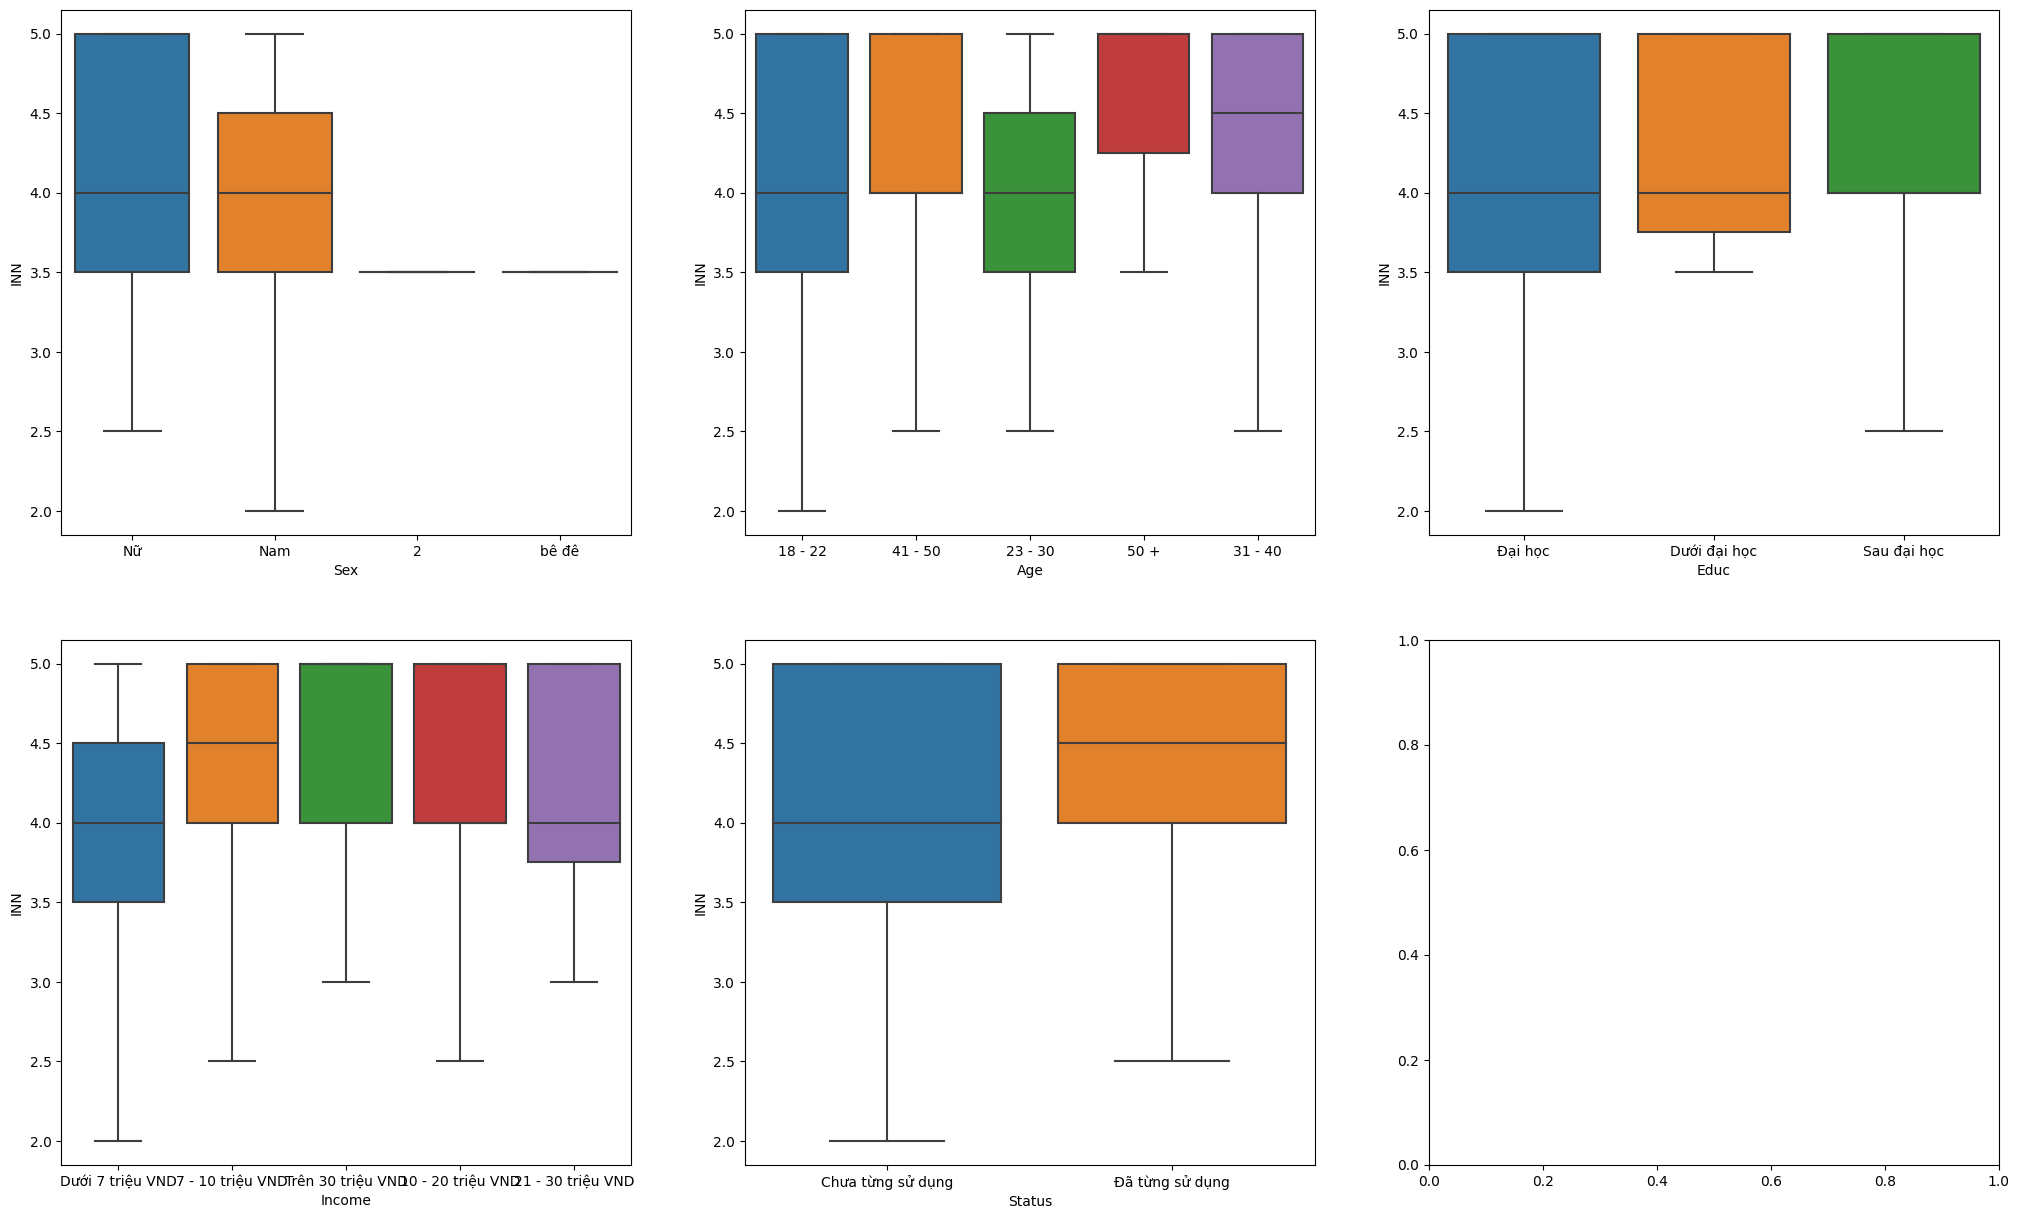

In [173]:
## Visualising Catagorical Variables:
# Build boxplot of all categorical variables to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize = (25,15))
plt.subplot(2,3,1)
sns.boxplot(x = 'Sex', y = 'INN', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Age', y = 'INN', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Educ', y = 'INN', data = df )
plt.subplot(2,3,4)
sns.boxplot(x = 'Income', y = 'INN',data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Status', y = 'INN',data = df)
plt.subplot(2,3,6)


There were 5 categorical variables in the dataset. We used Boxplot (refer the fig above) to study their effect on the dependent variable (‘INN’) .

Although in the first analysis file, I rejected the null hypothesis about the correlation between the categorical variables and preditor, those boxplots here can help me check the distribution of INN among the different levels of each categorical variable.
The inference that We could derive were:
- Sex: Women and Men have the median intention for Airbnb is 4.0 - realy high level intention to try a new type of sharing accommodation service.
- Age: There are more different level of intention from the younger people, especially people from 18-22 rating from 2.0 to 5.0 with the quite high median at 4.0. People over 40 have a tendency to try new experience.
- Educ: There are more different level of intention from people with university degree rating from 2.0 to 5.0 with the quite high median at 4.0.
- Income: High intention to experience Airbnb from all level of income rating from 4.0 to 4.5
- Status for using Airbnb previously: People who have used to experience Airbnb in the past are more likely to countinue sharing accommodation rather people with no Airbnb's experiences. '

# Modelling:

In [174]:
df.columns

Index(['Sex', 'Age', 'Educ', 'Income', 'Status', 'COL1', 'COL2', 'COL3',
       'EWOM1', 'EWOM2', 'EWOM3', 'EWOM4', 'LUA1', 'LUA2', 'LUA3', 'LUA4',
       'LUA5', 'FEM1', 'FEM2', 'FEM3', 'FEM4', 'LTO1', 'LTO2', 'LTO3', 'RES1',
       'RES2', 'RES3', 'ATT1', 'ATT2', 'ATT3', 'ATT4', 'SN1', 'SN2', 'SUM',
       'STDEV', 'INN'],
      dtype='object')

In [175]:
#Dividing into X and Y sets for the model building:
y_train = df_train.pop('INN')
X_train = df_train[['COL1', 'COL2', 'COL3',
       'EWOM1', 'EWOM2', 'EWOM3', 'EWOM4', 'LUA1', 'LUA2', 'LUA3', 'LUA4',
       'LUA5', 'FEM1', 'FEM2', 'FEM3', 'FEM4', 'LTO1', 'LTO2', 'LTO3', 'RES1',
       'RES2', 'RES3', 'ATT1', 'ATT2', 'ATT3', 'ATT4', 'SN1', 'SN2']]

In [176]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Intercept: {lm.intercept_}')
print(f'Coefs: {lm.coef_}')

Intercept: 0.3809539899955583
Coefs: [-0.05633065  0.04460054  0.07494747 -0.00221956 -0.01282586  0.10097689
 -0.05325801 -0.03074786  0.09456792 -0.01220093  0.06877939  0.04517056
  0.07998327 -0.00837348  0.10256028  0.00842103 -0.01403605 -0.05524636
 -0.04247577 -0.06795935  0.02043505 -0.0020886   0.1927228   0.13427556
  0.0830122   0.10905519  0.02520353  0.08657888]


The formula: 0.38 - 0.07COL1 + 0.04COL2 + 0.07COL3 -0.012EWOM2 + 0.10EWOM3 -0.05EWOM4 -0.03LUA1 + 0.095LUA2 + 0.095LUA3 + 0.069LUA4 + 0.045LUA5 + 0.08FEM1 + 0.10FEM3 -0.01LTO1 -0.055LTO2 -0.04LTO3 -0.07RES1 +0.02RES2 +0.19ATT1 +0.13ATT2 + 0.08ATT3 + 0.11ATT4 + 0.03SN1 + 0.09SN2 

In [177]:
Yhat = lm.predict(X_train)
coef = r2_score(y_train, Yhat)
coef


0.6478753168628631

/var/folders/dh/kmps1pqs5cj2x8gvpllf_0qc0000gn/T/ipykernel_92573/255263230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False)
/var/folders/dh/kmps1pqs5cj2x8gvpllf_0qc0000gn/T/ipykernel_92573/255263230.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

<AxesSubplot:xlabel='INN', ylabel='Density'>

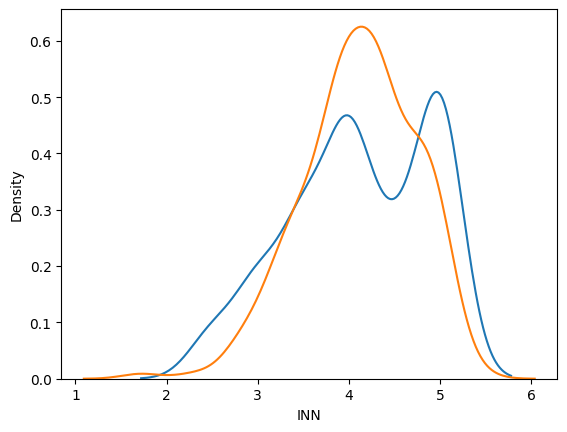

In [178]:
ax1 = sns.distplot(y_train, hist=False)
sns.distplot(Yhat, hist=False)